Library Import

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# imputer
from sklearn.impute import KNNImputer

# encoding , scaling
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, label_binarize, MinMaxScaler

# split data
from sklearn.model_selection import train_test_split, GridSearchCV

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

# evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, mean_squared_error,roc_curve, roc_auc_score


WE DON'T MERGE THE TWO MODELS EVEN THEY BOTH USE THE SAME DATASET BEACOUS OF "DATA LEAKAGE"

1- DATA EXPLORATION

In [179]:
# reading data
df = pd.read_csv(r"C:\Users\dohah\Documents\Projects\Detecting Malaria Model\MachineLearningProject\dataset\medical-cost-personal-datasets.csv")

In [180]:
# data exploration 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,1984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [181]:
print(df.dtypes)
print("------------------------------------------------------------------------------")
print(df.isnull().sum())

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
------------------------------------------------------------------------------
age          0
sex          0
bmi         10
children     0
smoker       0
region       0
charges      0
dtype: int64


In [182]:
# values
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


2- DATA PREPROCESSING

In [183]:
# checking for duplicate rows
print(df.duplicated().sum())
# drop dublicates
df = df.drop_duplicates()

1


In [184]:
print(df.duplicated().sum())

0


In [185]:
# check the missing values
df.isnull().sum()

age          0
sex          0
bmi         10
children     0
smoker       0
region       0
charges      0
dtype: int64

In [186]:
# handeling missing values <in the target>   -- fill it eith the median
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())  # ليه median او ليه mean 
# df = df.dropna()

In [187]:
# check the result of handeled values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [188]:
# target selecting
target = 'charges'

In [189]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [190]:
# categorical featur selecting
feature_cols = ['sex', 'smoker', 'region']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [191]:
# encoding categorical features & defining numerical featurs
X_cat = encoder.fit_transform(df[feature_cols])
X_num = df[['age', 'bmi', 'children']] 

In [192]:
pd.DataFrame(X_cat).head()

,0,1,2,3,4,5,6,7
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [193]:
# X & Y matrices

# merging cat with num data in featur matrix 
X = np.hstack([pd.DataFrame(X_num).values, X_cat]) # feature matrix     --- hstack : horizontal stack <nums at left , one hot at right>
# target
y = df[target] # target vector

In [194]:
# X check
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10
0,19.0,27.900,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [195]:
# y check
pd.DataFrame(y).head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,1984.47061
4,3866.85520


In [196]:
# split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=50,
                                                    shuffle=True
                                                    )


In [197]:
# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

3- LR MODEL

In [198]:
# Linear Regression

# train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# predict y
y_pred = regressor.predict(X_test)


4- EVALUATION

In [199]:
# check y_test & y_pred
comparison = pd.DataFrame({'y_test': y_test[:10].ravel(), 'y_pred': y_pred[:10].ravel()})
print(comparison)

        y_test        y_pred
0   1728.89700  -1742.014433
1   2643.26850   4112.650266
2  47896.79135  39936.975725
3  12333.82800  11839.237086
4   2974.12600   2208.477735
5   3279.86855   2884.671270
6   1631.66830   4626.379762
7  37701.87680  31814.282065
8   1977.81500   2905.065374
9   3732.62510   1111.306823


C:\Users\dohah\AppData\Local\Temp\ipykernel_32276\2285337742.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  comparison = pd.DataFrame({'y_test': y_test[:10].ravel(), 'y_pred': y_pred[:10].ravel()})


In [200]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE :", mse)
print("RMSE:", rmse)
print("Mean charges in test:", y_test.mean())

MSE : 35721700.68277332
RMSE: 5976.763395247743
Mean charges in test: 13331.6540730597


Actual vs Predicted Graph

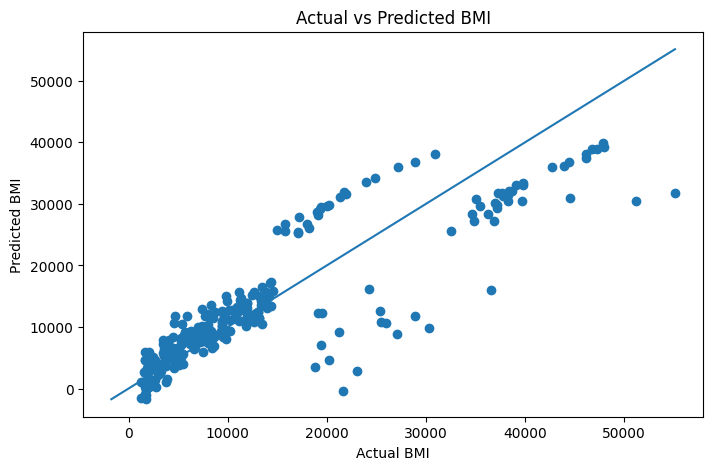

In [201]:
plt.figure(figsize=(8, 5))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.title("Actual vs Predicted BMI")

min_y = min(y_test.min(), y_pred.min())
max_y = max(y_test.max(), y_pred.max())
plt.plot([min_y, max_y], [min_y, max_y])

plt.show()

5- PREDICT BMI EXAMBLE dif - delete

In [202]:
trial_values = [[40, 0, 0, 120, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]]
trial_df = pd.DataFrame(trial_values, columns=X_train.columns)

predicted_bmi = regressor.predict(trial_df)
print("Predicted BMI:", round(predicted_bmi[0], 1))   # output should be -- 25.0 --

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [203]:
# Exambles from chat to check
# [30, 0, 0, 90, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]   22.5
# [55, 1, 1, 150, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0]	27.8
# [40, 0, 0, 120, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]	25.0
# [50, 1, 0, 140, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]	26.5